<a href="https://colab.research.google.com/github/Qaiserfarooq285/AI-Resume-Analyzer/blob/main/Lab7all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

univariate bivariate and multivariate analysis on heart diseas dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
heartdata = pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
heartdata.shape

(319795, 18)

In [ ]:
heartdata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
heartdata.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
heartdata.dtypes

,0
HeartDisease,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,float64
MentalHealth,float64
DiffWalking,object
Sex,object
AgeCategory,object


In [ ]:
heartdata.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
heartdata.nunique()

,0
HeartDisease,2
BMI,3604
Smoking,2
AlcoholDrinking,2
Stroke,2
PhysicalHealth,31
MentalHealth,31
DiffWalking,2
Sex,2
AgeCategory,13


**Univariate Analysis**

<ipython-input-10-32b14a2732e0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data=heartdata,palette='viridis')


<Axes: xlabel='HeartDisease', ylabel='count'>

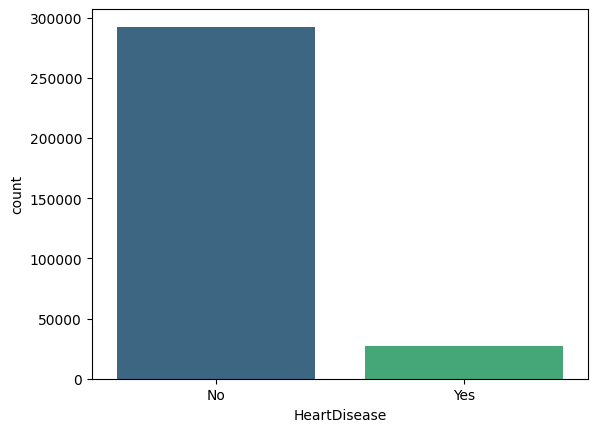

In [ ]:
sns.countplot(x='HeartDisease',data=heartdata,palette='viridis')

<Axes: xlabel='HeartDisease', ylabel='count'>

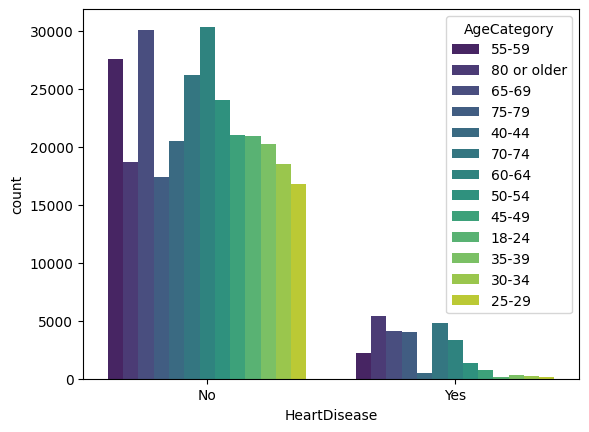

In [ ]:
sns.countplot(x='HeartDisease',hue='AgeCategory',data=heartdata,palette='viridis')

<Axes: xlabel='Sex', ylabel='Count'>

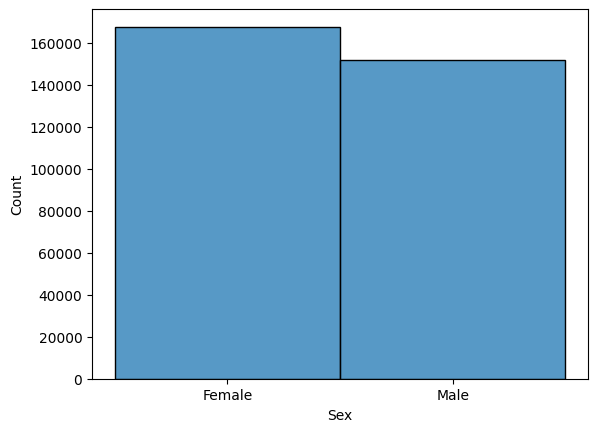

In [ ]:
sns.histplot(heartdata['Sex'])

<Axes: >

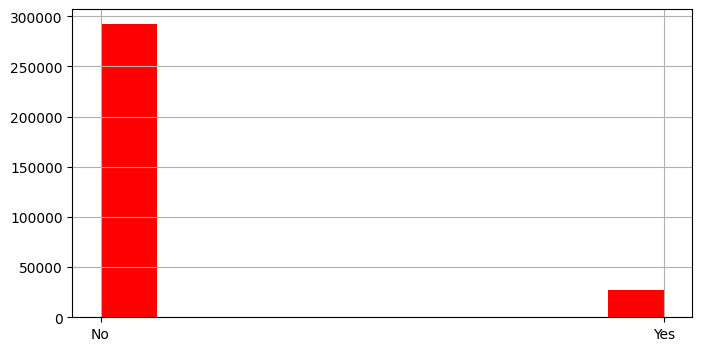

In [ ]:
heartdata['HeartDisease'].hist(color='red', figsize=(8,4))

<Axes: ylabel='AgeCategory'>

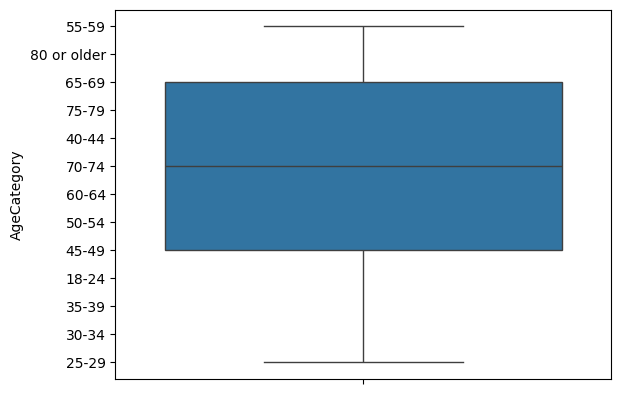

In [ ]:
sns.boxplot(y='AgeCategory', data=heartdata)

**Bivariate Analysis**

<Axes: xlabel='HeartDisease', ylabel='BMI'>

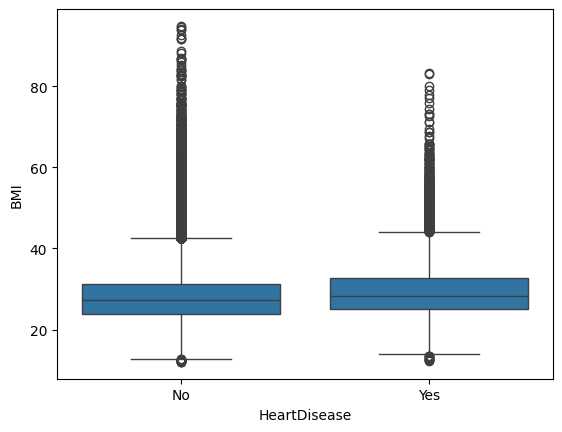

In [ ]:
sns.boxplot(x='HeartDisease',y='BMI',data=heartdata)

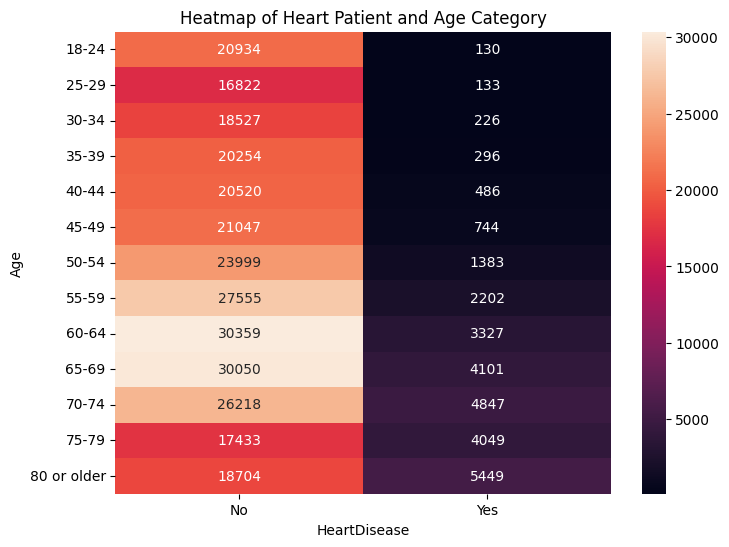

In [ ]:
# heatmap
ct=pd.crosstab(heartdata['AgeCategory'], heartdata['HeartDisease'])
plt.figure(figsize=(8, 6))
sns.heatmap(ct,annot=True,fmt='d')
plt.title('Heatmap of Heart Patient and Age Category')
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.show()

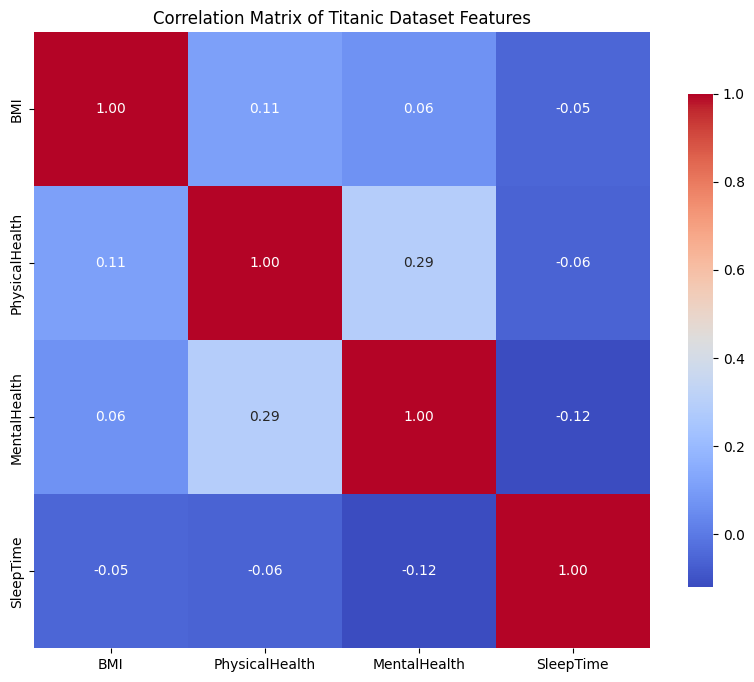

In [ ]:

numerical_features = heartdata.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()

**Multivariate Analysis**

<Axes: xlabel='HeartDisease', ylabel='SleepTime'>

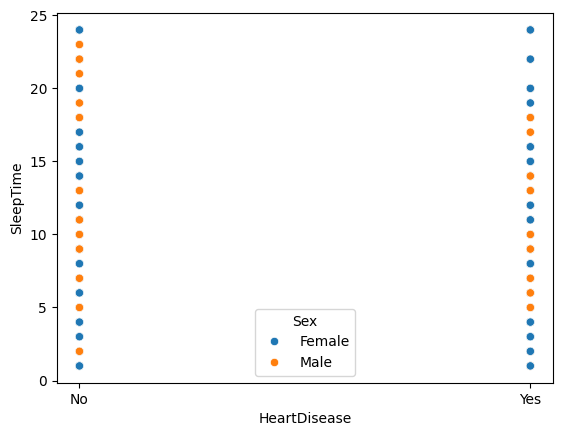

In [ ]:
sns.scatterplot(x='HeartDisease', y='SleepTime', hue='Sex', data=heartdata)

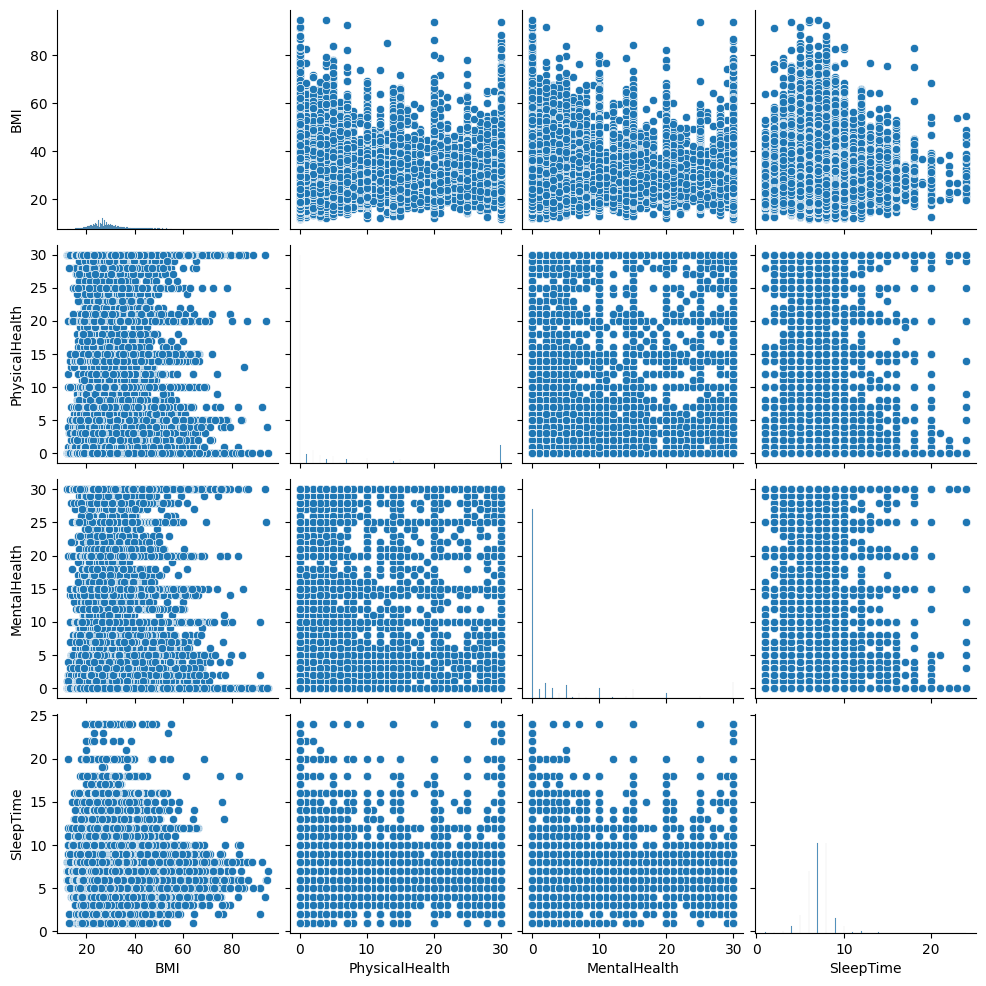

In [ ]:
sns.pairplot(heartdata)

**Pandas Profiling**

In [ ]:
!pip install ydata-profiling # Install Library
from ydata_profiling import ProfileReport # Import Library
# Load the Titanic dataset
df=pd.read_csv('heart_2020_cleaned.csv')
# Generate the profiling report
prof = ProfileReport(df)
prof.to_file(output_file='eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Preparation**

*   Data Imputation
*   Feature Transformation
    *   Feature Encoding
    *   Feature Scaling
*   Feature Creation
*   Feature Selection


**Data Imputation**

In [ ]:
heartdata.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
heartdata = heartdata.drop(['SleepTime', 'Diabetic','Race'], axis=1)

In [ ]:
heartdata['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
heartdata['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import KNNImputer

heart = pd.read_csv('heart_2020_cleaned.csv')
heart['KidneyDisease'] = heart['KidneyDisease'].map({'no': 0, 'yes': 1})
heart['GenHealth'] = heart['GenHealth'].map({'Very good': 3, 'Fair': 2, 'Good': 1,'Excellent': 4})

knn_columns = ['KidneyDisease', 'GenHealth']
# heartdata_knn should be a subset of the original 'heart' DataFrame
# Make sure it includes the columns you want to impute
heartdata_knn = heart[knn_columns]

imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data using KNN imputer
# Use heartdata_knn here for imputation
heart_imputed = imputer.fit_transform(heartdata_knn)

# Create a DataFrame with the imputed data
imputed_heart = pd.DataFrame(heart_imputed, columns=knn_columns)

# Display missing values after imputation
print("\nMissing values after imputation:\n", imputed_heart.isnull().sum())

# Display a sample of the imputed dataset
print("\nSample of the imputed dataset:\n", imputed_heart.head(10))


KeyboardInterrupt: 

**One Hot Encoder**

In [ ]:
print("Original 'sex' and 'embarked' columns:\n", heartdata[['HeartDisease','Sex']].head())

heartdata_onehot = pd.get_dummies(heartdata, columns=['HeartDisease','Sex'],dtype=int)

# Display the one-hot encoded columns
print("\nOne-Hot Encoded Titanic dataset (first few rows):\n", heartdata_onehot.head())

Original 'sex' and 'embarked' columns:
   HeartDisease     Sex
0           No  Female
1           No  Female
2           No    Male
3           No  Female
4           No  Female

One-Hot Encoded Titanic dataset (first few rows):
      BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
0  16.60     Yes              No     No             3.0          30.0   
1  20.34      No              No    Yes             0.0           0.0   
2  26.58     Yes              No     No            20.0          30.0   
3  24.21      No              No     No             0.0           0.0   
4  23.71      No              No     No            28.0           0.0   

  DiffWalking  AgeCategory PhysicalActivity  GenHealth Asthma KidneyDisease  \
0          No        55-59              Yes  Very good    Yes            No   
1          No  80 or older              Yes  Very good     No            No   
2          No        65-69              Yes       Fair    Yes            No   
3          No  

**MIN Max Scalar**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the Titanic dataset
heart = pd.read_csv('heart_2020_cleaned.csv')

# Step 2: Select features for scaling
# We will select 'Age' and 'Fare' for scaling
features_to_scale = ['AgeCategory']

# Step 3: Handle missing values
# Convert 'AgeCategory' to numerical representation before filling missing values
# Create a dictionary mapping age ranges to numerical values
age_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}

# Apply the mapping to the 'AgeCategory' column
heart['AgeCategory'] = heart['AgeCategory'].map(age_mapping)

# Now you can fill missing values with the median
heart['AgeCategory'].fillna(heart['AgeCategory'].median(), inplace=True)


# Step 4: Apply MinMaxScaler to the entire dataset
scaler = MinMaxScaler()

# Fit the scaler on the entire dataset and transform it
heart[features_to_scale] = scaler.fit_transform(heart[features_to_scale])

# Step 5: Display the results
print("After MinMax Scaling:")
print(heart[features_to_scale].head())

After MinMax Scaling:
   AgeCategory
0     0.583333
1     1.000000
2     0.750000
3     0.916667
4     0.333333


<ipython-input-29-c1b585dde2be>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['AgeCategory'].fillna(heart['AgeCategory'].median(), inplace=True)


***Feature Creation***

In [ ]:
import pandas as pd

# Step 1: Load the Titanic dataset
heart = pd.read_csv('heart_2020_cleaned.csv')

# Step 2: Inspect the dataset to understand the relevant columns
# SibSp = Number of Siblings/Spouses aboard
# Parch = Number of Parents/Children aboard

# Step 3: Create a new feature 'FamilySize'
heart['HealthCondition'] = heart['MentalHealth'] + heart['PhysicalHealth'] + 1

# Step 4: Display the results
print(heart[['MentalHealth', 'PhysicalHealth', 'HealthCondition']].head())

   MentalHealth  PhysicalHealth  HealthCondition
0          30.0             3.0             34.0
1           0.0             0.0              1.0
2          30.0            20.0             51.0
3           0.0             0.0              1.0
4           0.0            28.0             29.0


**Feature Selection **

Select those features that are numerical and interelated and revolve around main idea for machine learning